In [66]:
import numpy as np
import os
import matplotlib.pyplot as plt

def load_data(train = True):
    """
    Load the data from disk

    Parameters
    ----------
    train : bool
        Load training data if true, else load test data
    Returns
    -------
        Tuple:
            Images
            Labels
    """
    directory = 'train' if train else 'test'
    patterns = np.load(os.path.join('./data/', directory, 'images.npz'))['arr_0']
    labels = np.load(os.path.join('./data/', directory, 'labels.npz'))['arr_0']
    return patterns.reshape(len(patterns), -1), labels

def z_score_normalize(X, u = None, xd = None):
    """
    Performs z-score normalization on X. 

    f(x) = (x - μ) / σ
        where 
            μ = mean of x
            σ = standard deviation of x

    Parameters
    ----------
    X : np.array
        The data to z-score normalize
    u (optional) : np.array
        The mean to use when normalizing
    sd (optional) : np.array
        The standard deviation to use when normalizing

    Returns
    -------
        Tuple:
            Transformed dataset with mean 0 and stdev 1
            Computed statistics (mean and stdev) for the dataset to undo z-scoring.
    """
 
    if u is None:
        u = np.mean(X, axis=0)
    if xd is None:
        xd = np.std(X, axis=0)
    u = np.expand_dims(u, axis=0)
    xd = np.expand_dims(xd, axis=0)
    return (X - np.repeat(u, X.shape[0], axis=0).T)/np.repeat(xd, X.shape[0], axis=0).T

def min_max_normalize(X, _min = None, _max = None):
    """
    Performs min-max normalization on X. 

    f(x) = (x - min(x)) / (max(x) - min(x))

    Parameters
    ----------
    X : np.array
        The data to min-max normalize
    _min (optional) : np.array
        The min to use when normalizing
    _max (optional) : np.array
        The max to use when normalizing

    Returns
    -------
        Tuple:
            Transformed dataset with all values in [0,1]
            Computed statistics (min and max) for the dataset to undo min-max normalization.
    """
     
    if _min is None:
        _minn = np.min(X, axis=0)
    else:
        _minn = _min
    if _max is None:
        _maxx = np.max(X, axis=0)
    else:
        _maxx = _max
    _minn = np.expand_dims(_minn, axis=0)
    _maxx = np.expand_dims(_maxx, axis=0)
    _minn = np.repeat(_minn, X.shape[0], axis=0).T
    _maxx = np.repeat(_maxx, X.shape[0], axis=0).T
    res = (X - _minn) / (_maxx - _minn)
    return res

In [56]:
X_train, y_train = load_data()
X_test, y_test = load_data(train = False)

# sample inside different labels and visualize

In [26]:
# create label-matching dictionary
from collections import defaultdict

record_dict = defaultdict(list)
for count, label in enumerate(y_train):
    record_dict[label].append(count)

count_dict = dict(sorted(record_dict.items()))

In [30]:
# sample for each class
sample_dict = {}
for label in count_dict:
    sample_idx = np.random.choice(count_dict[label])
    sample_dict[label] = X_train[sample_idx]

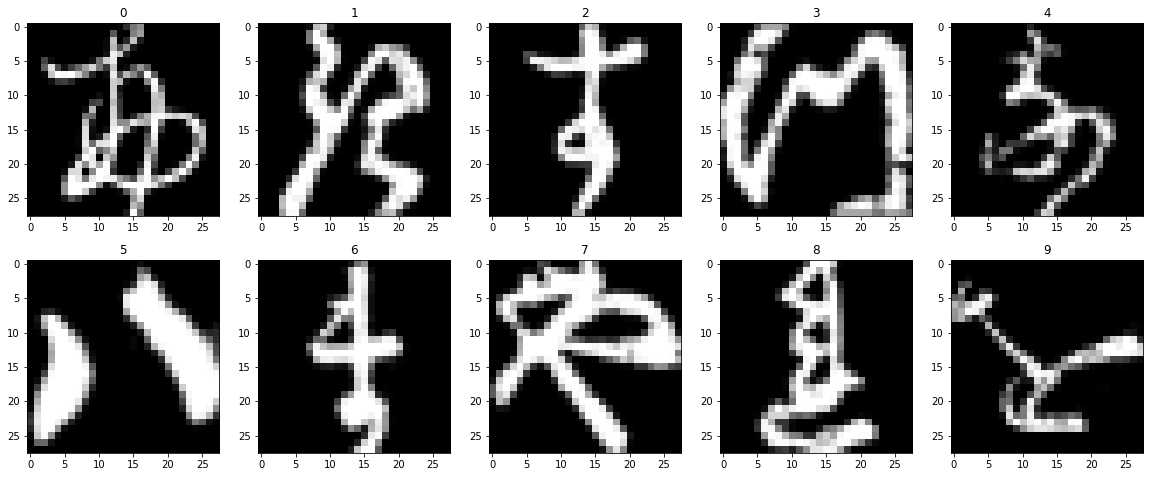

In [47]:
# visualize
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
for label in sample_dict:
    ax[label // 5][label % 5].imshow(np.reshape(sample_dict[label], (28, 28)), cmap='gray', vmin=0, vmax=255)
    ax[label // 5][label % 5].set_title(label)
plt.show()

## Check the counts

In [49]:
[len(mat) for label, mat in record_dict.items()]

[6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]

## View after z_score_normalize

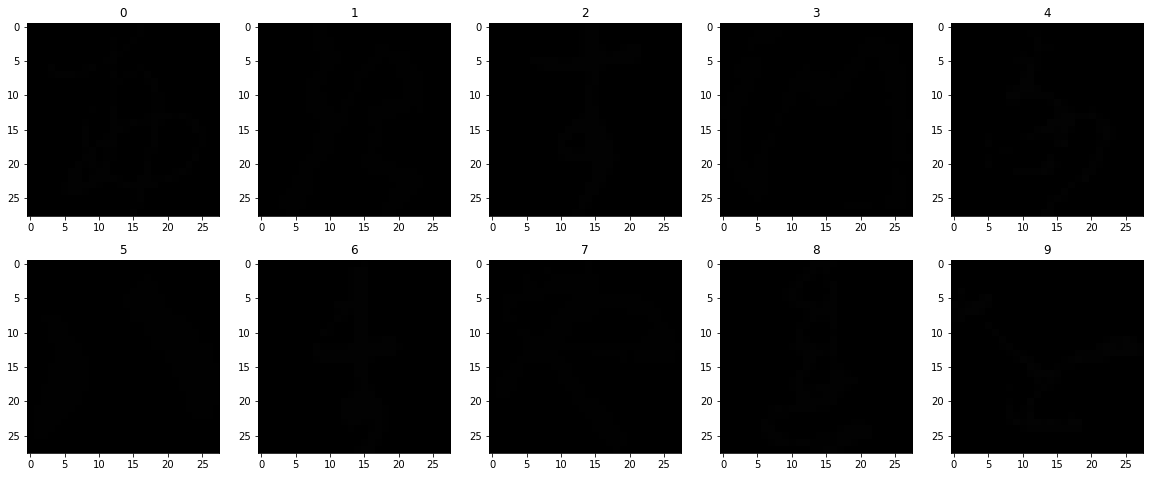

In [62]:
z_sample_dict = dict([(label, z_score_normalize(mat)) for label, mat in sample_dict.items()])

# visualize
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
for label in sample_dict:
    ax[label // 5][label % 5].imshow(np.reshape(z_sample_dict[label], (28, 28)), cmap='gray', vmin=0, vmax=255)
    ax[label // 5][label % 5].set_title(label)
plt.show()

## View after min_max_normalize

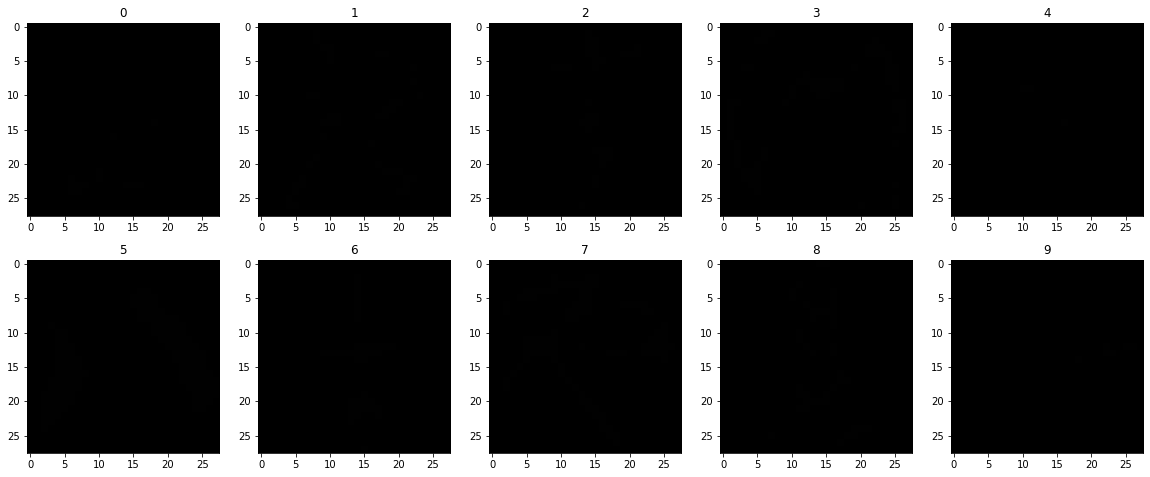

In [67]:
mm_sample_dict = dict([(label, min_max_normalize(mat)) for label, mat in sample_dict.items()])

# visualize
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))
for label in sample_dict:
    ax[label // 5][label % 5].imshow(np.reshape(mm_sample_dict[label], (28, 28)), cmap='gray', vmin=0, vmax=255)
    ax[label // 5][label % 5].set_title(label)
plt.show()

## Set Sizes

In [72]:
print('Size for train set:' + str(len(X_train)) + '\nSize for test set:' + str(len(X_test)))

Size for train set:60000
Size for test set:10000
